In [ ]:
# Importing the numpy library for numerical operations
import numpy as np
# Importing the matplotlib library for plotting graphs
import matplotlib.pyplot as plt
# Importing the pandas library for data manipulation and analysis
import pandas as pd


In [ ]:
# Loading the dataset

# Load the dataset from the CSV file into a pandas DataFrame. DataFrames make manipulating data easy and intuitive.
dataset = pd.read_csv('50_Startups.csv')

# Extract independent variables (R&D Spend, Administration, Marketing Spend, State) into X.
# iloc is used for index-based selection, so :, :-1 means all rows and all columns except the last one (Profit).
X = dataset.iloc[:, :-1].values

# Extract the dependent variable (Profit) into y.
# iloc[:, -1] means all rows and only the last column.
y = dataset.iloc[:, -1].values

In [ ]:
# Print the independent variables to see what they look like after extraction.
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [ ]:
#Encoding categorical data

# For machine learning algorithms to understand categorical data, we need to convert it into a numerical format.
# Import the necessary tools from sklearn for this transformation.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a column transformer that will transform the 4th column (index 3) which contains categorical data (State).
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

# Apply the transformer to our independent variables and convert it to a numpy array for compatibility with sklearn algorithms.
X = np.array(ct.fit_transform(X))

In [ ]:
# Print the independent variables to see how they've changed after the transformation.
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [ ]:
# Splitting the dataset into the Training set and Test set

# We'll split our dataset into a training set and a test set. The training set is used to teach our model,
# and the test set is used to evaluate how well it learned.
from sklearn.model_selection import train_test_split

# Split the data, with 80% being the training set and 20% being the test set. Random state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Fitting Multiple Linear Regression to the Training set

# Import the Linear Regression algorithm from sklearn.
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model.
regressor = LinearRegression()

# Fit the model to the training data. This is where the model learns the relationship between the inputs and the output.
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results

# Now that our model is trained, we can use it to make predictions on the test set.
y_pred = regressor.predict(X_test)

# Set print options for numpy to make the output more readable by setting a fixed precision.
np.set_printoptions(precision=2)

# Concatenate the predictions and the actual values to compare them side by side.
# reshape is used to convert the arrays into the same shape for concatenation.
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


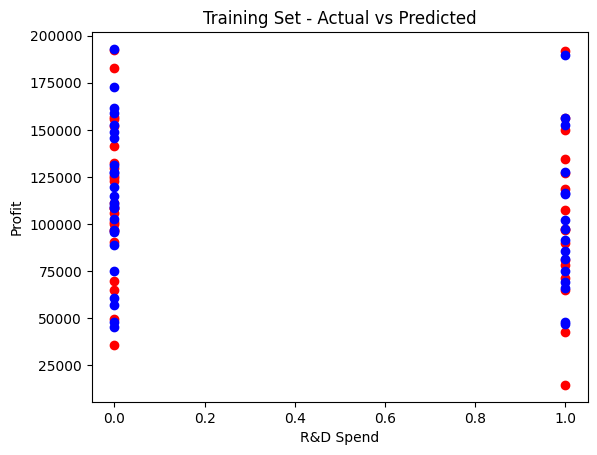

In [ ]:
# Visualising the Training set results

# Creating a scatter plot of the training data (Profit vs R&D Spend)
# Scatter plot for actual and predicted values in the training set

# Plotting actual values in red
plt.scatter(X_train[:, 0], y_train, color='red', label='Actual')

# Plotting predicted values in blue
plt.scatter(X_train[:, 0], regressor.predict(X_train), color='blue', label='Predicted')

# Setting the title of the plot
plt.title('Training Set - Actual vs Predicted')

# Labeling the x-axis
plt.xlabel('R&D Spend')

# Labeling the y-axis
plt.ylabel('Profit')

# Showing the plot
plt.show()

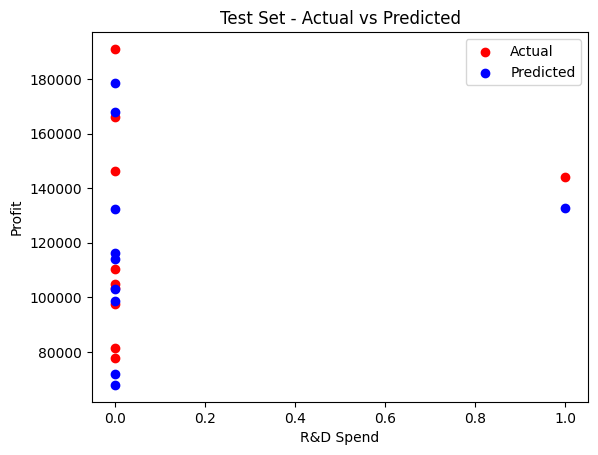

In [ ]:
# Visualising the Test set results

# Creating a scatter plot of the test data (Profit vs R&D Spend)
# Scatter plot for actual and predicted values in the test set

# Plotting actual values in red
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual')

# Plotting predicted values in blue
plt.scatter(X_test[:, 0], y_pred, color='blue', label='Predicted')

# Setting the title of the plot
plt.title('Test Set - Actual vs Predicted')

# Labeling the x-axis
plt.xlabel('R&D Spend')

# Labeling the y-axis
plt.ylabel('Profit')

# Displaying the legend
plt.legend()

# Showing the plot
plt.show()

In [ ]:
# Calculating Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE),  R-squared (Coefficient of Determination)

# Importing necessary functions for calculating evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Directly calculating and printing the evaluation metrics for the Training set
print("Training set evaluation metrics:")

# Calculating the mean squared error (MSE) for the training set
MSE1 = mean_squared_error(y_train, regressor.predict(X_train))
print(f"Mean Squared Error (MSE): ", format(MSE1, '.2f'))

# Calculating the root mean squared error (RMSE) for the training set
RMSE1 = mean_squared_error(y_train, regressor.predict(X_train), squared=False)
print(f"Root Mean Squared Error (RMSE):", format(RMSE1, '.2f'))

# Calculating the mean absolute error (MAE) for the training set
MAE1 = mean_absolute_error(y_train, regressor.predict(X_train))
print(f"Mean Absolute Error (MAE):", format(MAE1, '.2f'))

# Calculating the R-squared (R²) score for the training set
r2_score1 = r2_score(y_train, regressor.predict(X_train))
print(f"R-squared (R²):", format(r2_score1, '.2f'))
# Directly calculating and printing the evaluation metrics for the Test set
print("\nTest set evaluation metrics:")

# Calculating the mean squared error (MSE) for the test set
MSE2 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): ", format(MSE2, '.2f'))

# Calculating the root mean squared error (RMSE) for the test set
RMSE2 = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): ", format(RMSE2, '.2f'))

# Calculating the mean absolute error (MAE) for the test set
MAE2 = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): ", format(MAE2, '.2f'))

# Calculating the R-squared (R²) score for the test set
r2_score2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): ", format(r2_score2, '.2f'))


Training set evaluation metrics:
Mean Squared Error (MSE):  81571001.80
Root Mean Squared Error (RMSE): 9031.67
Mean Absolute Error (MAE): 6341.54
R-squared (R²): 0.95

Test set evaluation metrics:
Mean Squared Error (MSE):  83502864.03
Root Mean Squared Error (RMSE):  9137.99
Mean Absolute Error (MAE):  7514.29
R-squared (R²):  0.93
